<a href="https://colab.research.google.com/github/FabiBarbos/Churn/blob/main/Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

In [252]:
df = pd.read_csv('Dataset_teste_Just_BI.csv',sep=';')

In [253]:
print(df.head())

   customer_id customer_acquisition_channel  year week  net_revenue  \
0       206461               Paid Marketing  2014  W09           71   
1       462640               Paid Marketing  2015  W25           28   
2       666461                     Referral  2015  W50           40   
3       183202                     Referral  2013  W42           18   
4       410993                     Referral  2014  W29            0   

   gross_revenue  boxes  
0             71      2  
1             56      1  
2             40      1  
3             37      1  
4             37      1  


In [254]:
num_linhas_df = len(df)
print(num_linhas_df)

715875


In [255]:
print(df.isnull().any())

customer_id                     False
customer_acquisition_channel    False
year                            False
week                            False
net_revenue                     False
gross_revenue                   False
boxes                           False
dtype: bool


In [256]:
print(df.isnull().sum())

customer_id                     0
customer_acquisition_channel    0
year                            0
week                            0
net_revenue                     0
gross_revenue                   0
boxes                           0
dtype: int64


In [257]:
print(df.dtypes)

customer_id                      int64
customer_acquisition_channel    object
year                             int64
week                            object
net_revenue                      int64
gross_revenue                    int64
boxes                            int64
dtype: object


In [258]:
results = df.groupby('year').agg({'gross_revenue': 'sum', 'net_revenue': 'sum', 'boxes': 'sum'})

In [259]:
print(results)

      gross_revenue  net_revenue   boxes
year                                    
2013        6134328      5295828  156289
2014       11505225     10161460  291647
2015       12019567     10611613  292778


In [260]:
results = df.groupby('year').agg({'gross_revenue': 'sum', 'net_revenue': 'sum', 'boxes': 'sum'}).reset_index()

In [261]:
results.head()

,year,gross_revenue,net_revenue,boxes
0,2013,6134328,5295828,156289
1,2014,11505225,10161460,291647
2,2015,12019567,10611613,292778


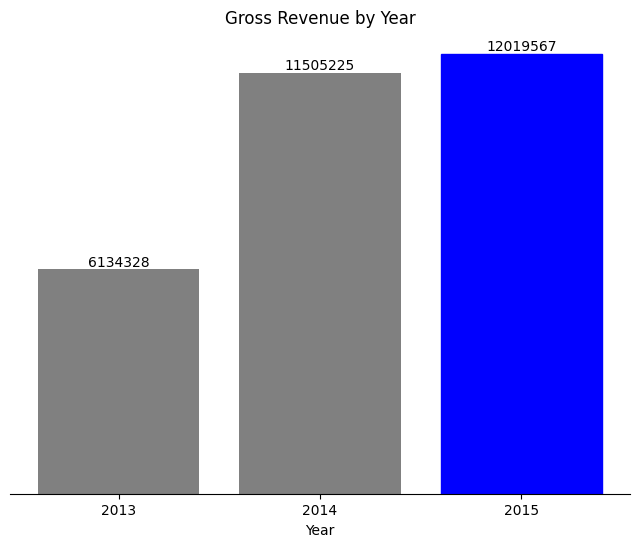

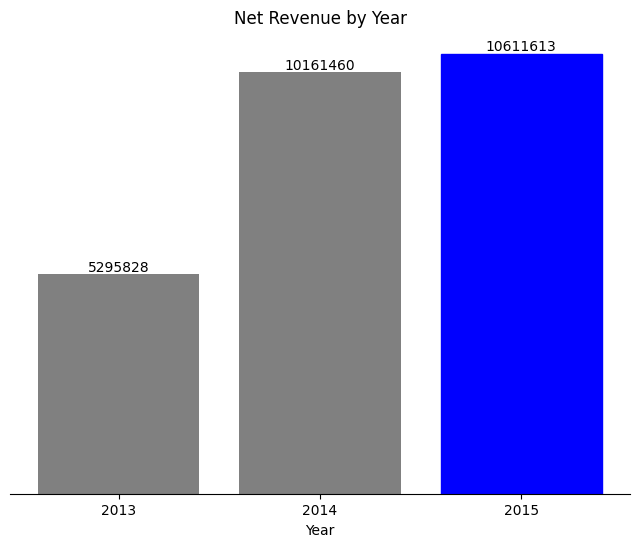

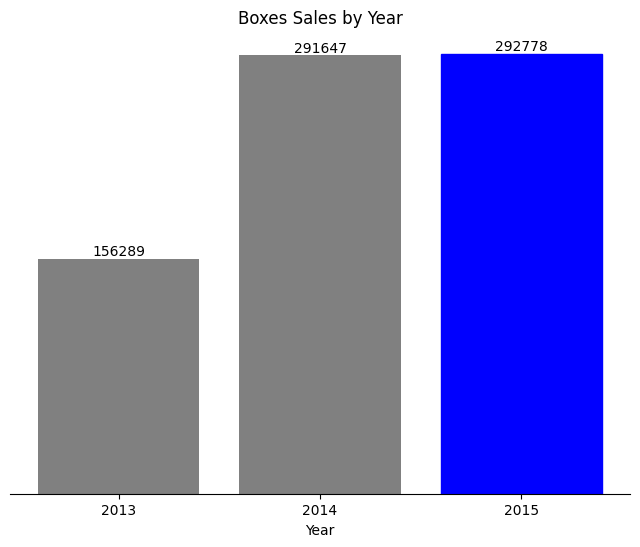

In [262]:
# Dados
years = [2013, 2014, 2015]
metrics = ['gross_revenue', 'net_revenue', 'boxes']
labels = ['Gross Revenue', 'Net Revenue', 'Boxes Sales']

# Criar um gráfico separado para cada métrica
for metric, label in zip(metrics, labels):
    plt.figure(figsize=(8, 6))
    bars = plt.bar(range(len(years)), results[metric], color='grey')
    bars[-1].set_color('blue')
    plt.xticks(range(len(years)), years)  # Definir os anos como os rótulos no eixo x
    plt.xlabel('Year')
    plt.title(f'{label} by Year')
    plt.yticks([])

    # Adicionar os valores no topo das barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 str(int(height)), ha='center', va='bottom')

    # Remover bordas superior, direita e esquerda
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)             

    plt.show()

In [263]:
# Agrupar os dados por "year" e "customer_acquisition_channel" e calcular as somas
grouped_year_channel = df.groupby(['year', 'customer_acquisition_channel']).agg({
    'net_revenue': 'sum',
    'gross_revenue': 'sum',
    'boxes': 'sum'
}).reset_index()

In [264]:
grouped_year_channel.head()

,year,customer_acquisition_channel,net_revenue,gross_revenue,boxes
0,2013,Paid Marketing,4489272,5103819,129679
1,2013,Referral,806556,1030509,26610
2,2014,Paid Marketing,8440431,9385996,237085
3,2014,Referral,1721029,2119229,54562
4,2015,Paid Marketing,8169031,9023314,218626


In [265]:
def generate_line_plots(data, metrics):
    for metric in metrics:
        # Filtrar o DataFrame para a métrica atual
        metric_data = data[['year', 'customer_acquisition_channel', metric]]

        # Plotar gráfico de linhas usando o Seaborn
        plt.figure(figsize=(8, 6))
        ax = sns.lineplot(data=metric_data, x='year', y=metric, hue='customer_acquisition_channel', marker='o')

        # Eliminando as bordas de cima, da direita e esquerda
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
       
        # Adicionar os valores da métrica junto às linhas
        for year, channel, value in metric_data.values:
            plt.text(year, value, str(value), ha='center', va='bottom')

        plt.xlabel('Year')
        plt.ylabel(metric)
        plt.title('Total {} by Customer Acquisition Channel for Each Year'.format(metric))
        plt.legend()
        plt.tight_layout()
        plt.ylabel('')  # Remover o rótulo do eixo y

        # Remover o eixo y
        ax.set_yticks([])

        # Ajustar os rótulos do eixo x
        years = metric_data['year'].unique()
        plt.xticks(years, [int(year) for year in years])

        plt.show()

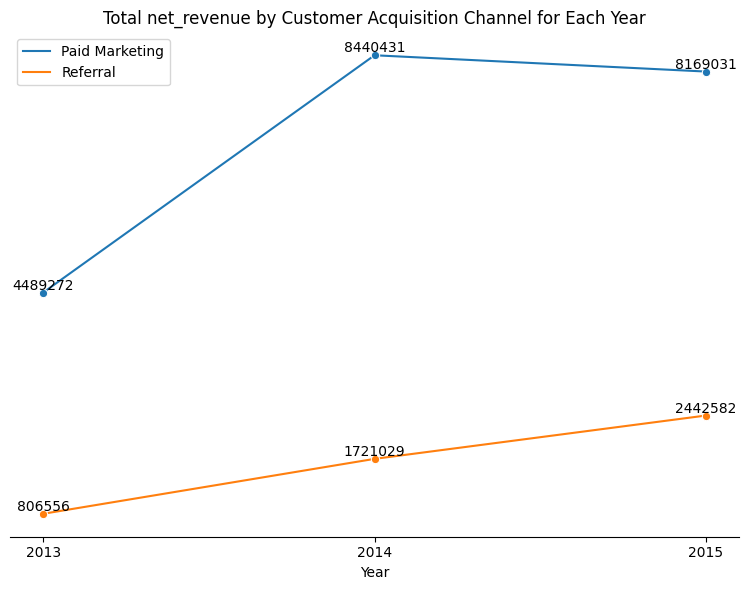

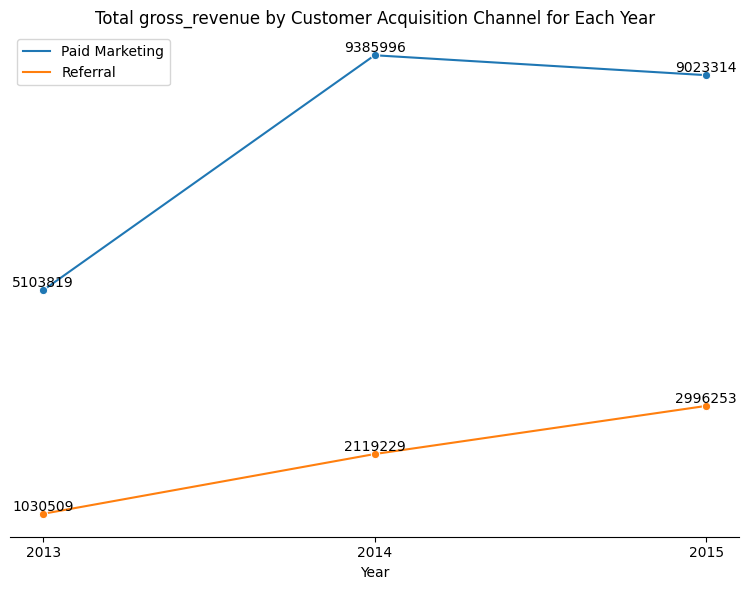

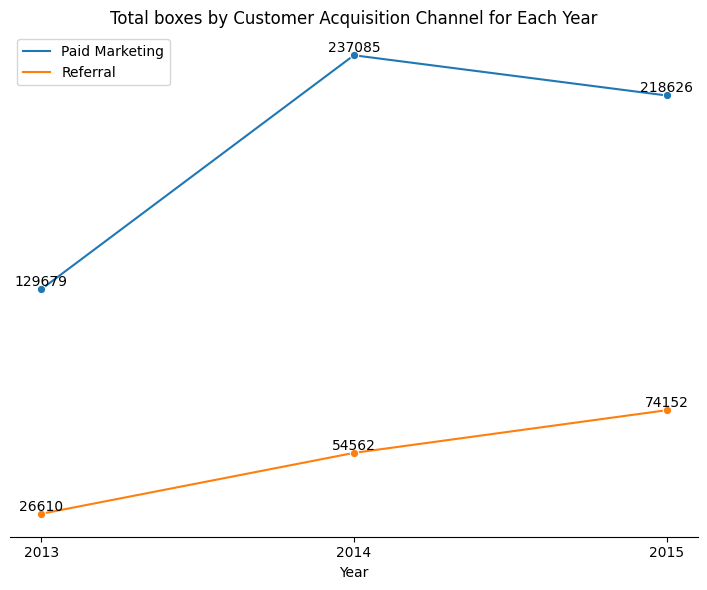

In [266]:
generate_line_plots(grouped_year_channel, ['net_revenue', 'gross_revenue', 'boxes'])

In [267]:
grouped_year_channel['Ticket_Medio'] = grouped_year_channel['gross_revenue'] / grouped_year_channel['boxes']

In [268]:
# Filtrar dados para 2013 e 2015
grouped_year_channel_2013 = grouped_year_channel[grouped_year_channel['year'] == 2013]
grouped_year_channel_2015 = grouped_year_channel[grouped_year_channel['year'] == 2015]

In [269]:
# Encontrar o canal de aquisição de clientes com o maior Ticket Médio em 2013
channel_2013_teste = grouped_year_channel_2013.groupby('customer_acquisition_channel')['Ticket_Medio'].mean().idxmax()

In [270]:
# Encontrar o canal de aquisição de clientes com o maior Ticket Médio em 2015
channel_2015_teste = grouped_year_channel_2015.groupby('customer_acquisition_channel')['Ticket_Medio'].mean().idxmax()

In [271]:
print("Canal de Aquisição de Clientes com maior Ticket Médio em 2013:", channel_2013_teste)
print("Canal de Aquisição de Clientes com maior Ticket Médio em 2015:", channel_2015_teste)

Canal de Aquisição de Clientes com maior Ticket Médio em 2013: Paid Marketing
Canal de Aquisição de Clientes com maior Ticket Médio em 2015: Paid Marketing


In [272]:
# Calcular o Ticket Médio
df['Ticket_Medio'] = df['gross_revenue'] / df['boxes']

In [273]:
# Filtrar dados para 2013 e 2015
df_2013 = df[df['year'] == 2013]
df_2015 = df[df['year'] == 2015]

In [274]:
num_linhas_df_2013 = len(df_2013)
print(num_linhas_df_2013)

147177


In [275]:
num_linhas_df_2015 = len(df_2015)
print(num_linhas_df_2015)

288204


In [276]:
# Encontrar o canal de aquisição de clientes com o maior Ticket Médio em 2013
channel_2013 = df_2013.groupby('customer_acquisition_channel')['Ticket_Medio'].mean().idxmax()

In [277]:
# Encontrar o canal de aquisição de clientes com o maior Ticket Médio em 2015
channel_2015 = df_2015.groupby('customer_acquisition_channel')['Ticket_Medio'].mean().idxmax()

In [278]:
print("Canal de Aquisição de Clientes com maior Ticket Médio em 2013:", channel_2013)
print("Canal de Aquisição de Clientes com maior Ticket Médio em 2015:", channel_2015)

Canal de Aquisição de Clientes com maior Ticket Médio em 2013: Paid Marketing
Canal de Aquisição de Clientes com maior Ticket Médio em 2015: Paid Marketing


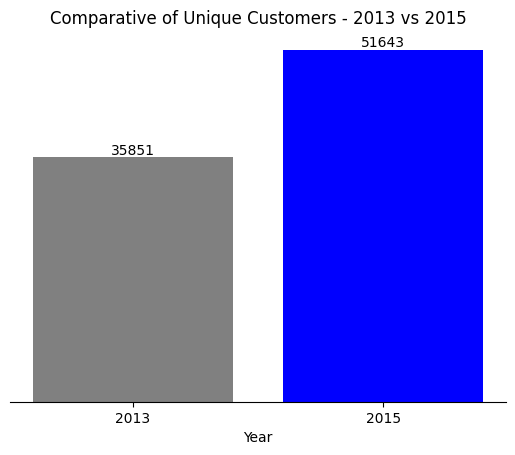

In [279]:
# Obter o número de clientes únicos por ano
clientes_unicos_2013 = df_2013['customer_id'].nunique()
clientes_unicos_2015 = df_2015['customer_id'].nunique()

# Criar o gráfico de barras comparativo
anos = ['2013', '2015']
clientes_unicos = [clientes_unicos_2013, clientes_unicos_2015]

# Definir as cores das barras
cores = ['grey', 'blue']

fig, ax = plt.subplots()

bar = ax.bar(anos, clientes_unicos, color=cores)
plt.xlabel('Year')
plt.title('Comparative of Unique Customers - 2013 vs 2015')

# Remover os valores do eixo y
plt.yticks([])

# Adicionar o valor no topo de cada barra
for i, v in enumerate(clientes_unicos):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Remover bordas superior, direita e esquerda
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)    

# Exibir o gráfico
plt.show()

Para incrementar as análises em relação a resultados de vendas e análises sobre os clientes, listo abaixo alguns dados complementares que podem ser importantes:

(i) dados demográficos dos clientes: informações como idade, gênero, localização geográfica, nível de renda e estado civil dos clientes podem ajudar a segmentar e entender melhor o perfil dos consumidores. Isso pode ser útil para direcionar estratégias de marketing e oferecer produtos e serviços mais adequados às diferentes necessidades dos clientes;

(ii) dados comportamentais do cliente: coletar informações sobre o comportamento dos clientes, como histórico de compras, frequência de compra, produtos mais comprados e hábitos de consumo, pode fornecer insights valiosos para personalizar ofertas, melhorar a experiência do cliente e identificar oportunidades de venda cruzada ou venda adicional;

(iii) dados de satisfação do cliente: medir a satisfação do cliente por meio de pesquisas ou avaliações pós-compra pode fornecer informações sobre a qualidade do produto, atendimento ao cliente e experiência geral de compra. Esses dados ajudam a identificar pontos fortes e fracos do negócio, bem como áreas que podem precisar de melhoria;

(iv) dados de preços e promoções: acompanhar os dados de preços e promoções, como descontos oferecidos, datas de promoção, impacto nas vendas e preferências dos clientes, pode ajudar a otimizar a estratégia de precificação e promocional, maximizando os resultados de vendas.

(v) dados de feedback dos clientes: ouvir o feedback direto dos clientes por meio de canais de comunicação, como atendimento ao cliente, redes sociais ou avaliações online, pode fornecer insights valiosos sobre a satisfação do cliente, problemas enfrentados e oportunidades de melhoria.


In [280]:
# Filtrar os dados necessários
df_week_a_week = df[['year', 'week', 'customer_acquisition_channel','gross_revenue', 'net_revenue', 'boxes']]
df_week_a_week = pd.get_dummies(df_week_a_week, columns=['week'])

In [281]:
num_linhas_df_week_a_week = len(df_week_a_week)
print(num_linhas_df_week_a_week)

715875


In [282]:
df_week_a_week.head(10)

,year,customer_acquisition_channel,gross_revenue,net_revenue,boxes,week_W01,week_W02,week_W03,week_W04,week_W05,...,week_W44,week_W45,week_W46,week_W47,week_W48,week_W49,week_W50,week_W51,week_W52,week_W53
0,2014,Paid Marketing,71,71,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,Paid Marketing,56,28,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,Referral,40,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2013,Referral,37,18,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,Referral,37,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2014,Referral,37,23,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2014,Referral,37,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2015,Paid Marketing,84,84,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2013,Paid Marketing,37,37,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,2014,Referral,37,37,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [283]:
# Função para calcular o net revenue por semana
def calcular_net_revenue_por_semana(df):
    # Selecionar apenas as colunas de semana (week)
    colunas_semana = [coluna for coluna in df.columns if coluna.startswith('week_')]

    # Criar um dicionário para armazenar a soma do net revenue por semana
    soma_net_revenue_semana = {}

    # Calcular a soma do net revenue para cada coluna de semana
    for coluna in colunas_semana:
        soma_net_revenue_semana[coluna] = df['net_revenue'][df[coluna] == 1].sum()

    # Criar um DataFrame a partir do dicionário
    df_resultado = pd.DataFrame.from_dict(soma_net_revenue_semana, orient='index', columns=['Total_net_revenue'])
    df_resultado = df_resultado.reset_index()
    df_resultado.columns = ['week', 'Total_net_revenue']
    df_resultado['week'] = df_resultado['week'].str.replace('week_', '')
    return df_resultado

# Calcular o net revenue por semana para cada ano
df_resultado_net_revenue_2013 = calcular_net_revenue_por_semana(df_week_a_week[df_week_a_week['year'] == 2013])
df_resultado_net_revenue_2013 = df_resultado_net_revenue_2013.assign(year=pd.Series(["2013"] * len(df_resultado_net_revenue_2013)))
df_resultado_net_revenue_2014 = calcular_net_revenue_por_semana(df_week_a_week[df_week_a_week['year'] == 2014])
df_resultado_net_revenue_2014 = df_resultado_net_revenue_2014.assign(year=pd.Series(["2014"] * len(df_resultado_net_revenue_2014)))
df_resultado_net_revenue_2015 = calcular_net_revenue_por_semana(df_week_a_week[df_week_a_week['year'] == 2015])
df_resultado_net_revenue_2015 = df_resultado_net_revenue_2015.assign(year=pd.Series(["2015"] * len(df_resultado_net_revenue_2015)))


In [284]:
# Juntar os três dataframes Total net revenue
df_resultado_net_revenue = pd.concat([df_resultado_net_revenue_2013, df_resultado_net_revenue_2014, df_resultado_net_revenue_2015])
df_resultado_net_revenue.head()

,week,Total_net_revenue,year
0,W01,0,2013
1,W02,2310,2013
2,W03,12342,2013
3,W04,25807,2013
4,W05,35713,2013


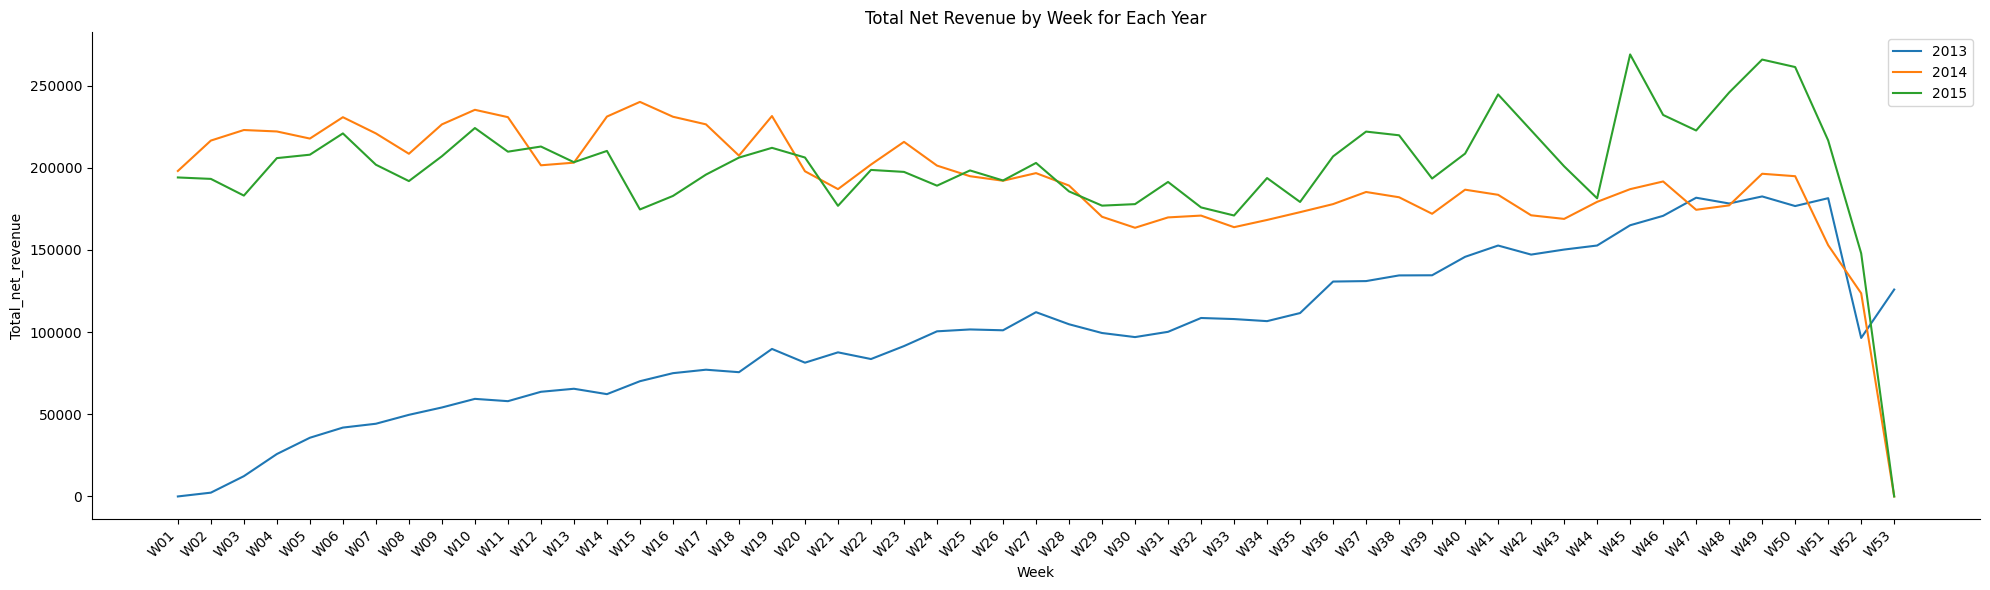

In [285]:
# Plotar gráfico de linhas
plt.figure(figsize=(20, 6))
for year in df_resultado_net_revenue['year'].unique():
    df_year = df_resultado_net_revenue[df_resultado_net_revenue['year'] == year]
    plt.plot(df_year['week'], df_year['Total_net_revenue'], label=str(year))

plt.xlabel('Week')
plt.ylabel('Total_net_revenue')
plt.title('Total Net Revenue by Week for Each Year')
# Ajustar espaçamento e orientação dos rótulos do eixo x
plt.xticks(rotation=45, ha='right')

# Remover as bordas de cima e da direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
      
plt.legend()
plt.tight_layout()
plt.show()

In [286]:
# Função para calcular o gross revenue por semana
def calcular_gross_revenue_por_semana(df):
    # Selecionar apenas as colunas de semana (week)
    colunas_semana = [coluna for coluna in df.columns if coluna.startswith('week_')]

    # Criar um dicionário para armazenar a soma do gross revenue por semana
    soma_gross_revenue_semana = {}

    # Calcular a soma do net revenue para cada coluna de semana
    for coluna in colunas_semana:
        soma_gross_revenue_semana[coluna] = df['gross_revenue'][df[coluna] == 1].sum()

    # Criar um DataFrame a partir do dicionário
    df_resultado = pd.DataFrame.from_dict(soma_gross_revenue_semana, orient='index', columns=['Total_gross_revenue'])
    df_resultado = df_resultado.reset_index()
    df_resultado.columns = ['week', 'Total_gross_revenue']
    df_resultado['week'] = df_resultado['week'].str.replace('week_', '')
    return df_resultado

# Calcular o net revenue por semana para cada ano
df_resultado_gross_revenue_2013 = calcular_gross_revenue_por_semana(df_week_a_week[df_week_a_week['year'] == 2013])
df_resultado_gross_revenue_2013 = df_resultado_gross_revenue_2013.assign(year=pd.Series(["2013"] * len(df_resultado_gross_revenue_2013)))
df_resultado_gross_revenue_2014 = calcular_gross_revenue_por_semana(df_week_a_week[df_week_a_week['year'] == 2014])
df_resultado_gross_revenue_2014 = df_resultado_gross_revenue_2014.assign(year=pd.Series(["2014"] * len(df_resultado_gross_revenue_2014)))
df_resultado_gross_revenue_2015 = calcular_gross_revenue_por_semana(df_week_a_week[df_week_a_week['year'] == 2015])
df_resultado_gross_revenue_2015 = df_resultado_gross_revenue_2015.assign(year=pd.Series(["2015"] * len(df_resultado_gross_revenue_2015)))

In [287]:
# Juntar os três dataframes Total gross revenue
df_resultado_gross_revenue = pd.concat([df_resultado_gross_revenue_2013, df_resultado_gross_revenue_2014, df_resultado_gross_revenue_2015])
df_resultado_gross_revenue.head()

,week,Total_gross_revenue,year
0,W01,0,2013
1,W02,4047,2013
2,W03,20296,2013
3,W04,35253,2013
4,W05,44641,2013


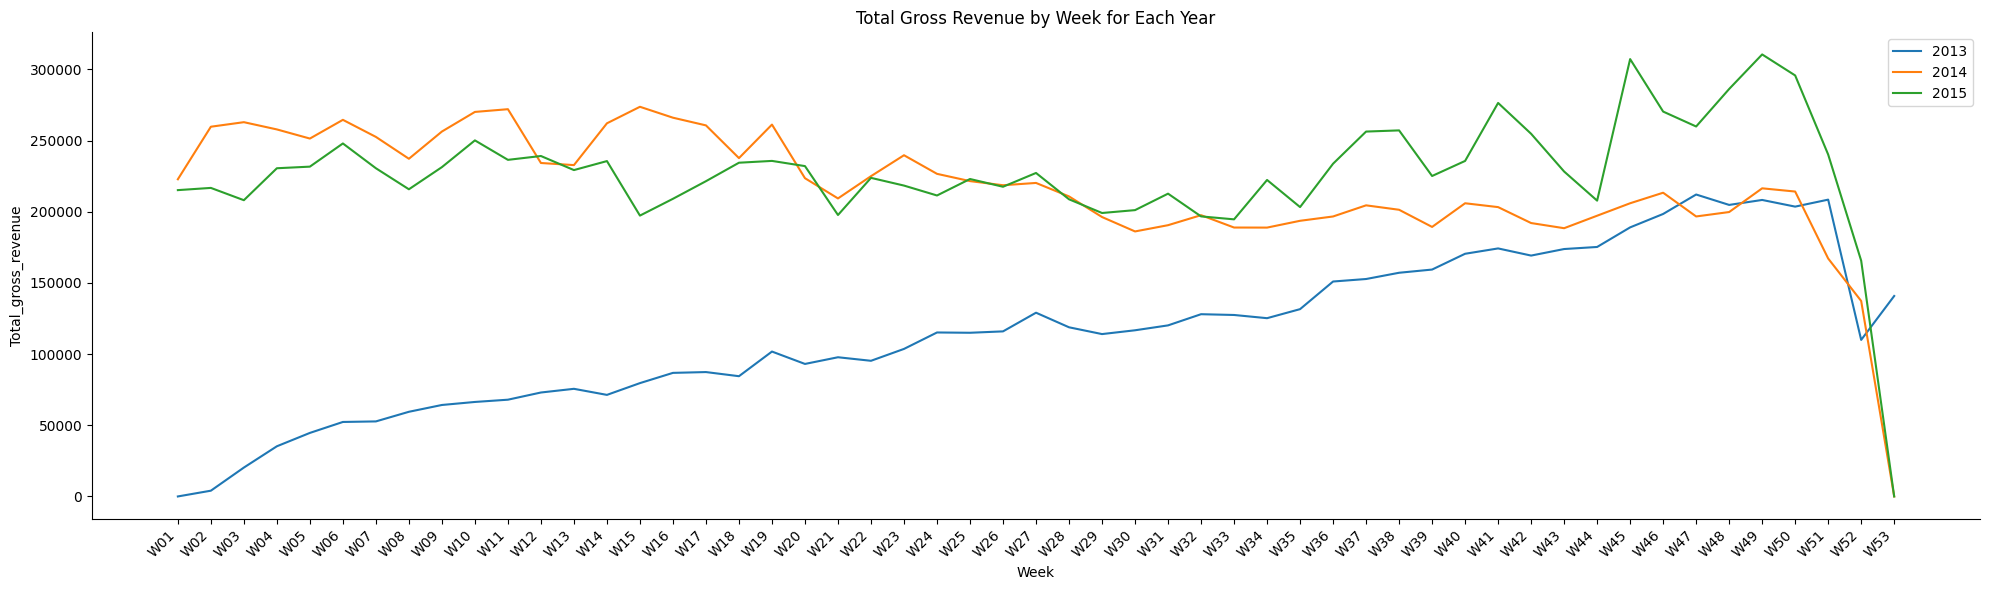

In [288]:
# Plotar gráfico de linhas
plt.figure(figsize=(20, 6))
for year in df_resultado_gross_revenue['year'].unique():
    df_year = df_resultado_gross_revenue[df_resultado_gross_revenue['year'] == year]
    plt.plot(df_year['week'], df_year['Total_gross_revenue'], label=str(year))

plt.xlabel('Week')
plt.ylabel('Total_gross_revenue')
plt.title('Total Gross Revenue by Week for Each Year')
# Ajustar espaçamento e orientação dos rótulos do eixo x
plt.xticks(rotation=45, ha='right')

# Remover as bordas de cima e da direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.tight_layout()
plt.show()

In [289]:
# Função para calcular boxes por semana
def calcular_boxes_por_semana(df):
    # Selecionar apenas as colunas de semana (week)
    colunas_semana = [coluna for coluna in df.columns if coluna.startswith('week_')]

    # Criar um dicionário para armazenar a soma de boxes por semana
    soma_boxes_semana = {}

    # Calcular a soma de boxes para cada coluna de semana
    for coluna in colunas_semana:
        soma_boxes_semana[coluna] = df['boxes'][df[coluna] == 1].sum()

    # Criar um DataFrame a partir do dicionário
    df_resultado = pd.DataFrame.from_dict(soma_boxes_semana, orient='index', columns=['Total_boxes'])
    df_resultado = df_resultado.reset_index()
    df_resultado.columns = ['week', 'Total_boxes']
    df_resultado['week'] = df_resultado['week'].str.replace('week_', '')
    return df_resultado

# Calcular o net revenue por semana para cada ano
df_resultado_boxes_2013 = calcular_boxes_por_semana(df_week_a_week[df_week_a_week['year'] == 2013])
df_resultado_boxes_2013 = df_resultado_boxes_2013.assign(year=pd.Series(["2013"] * len(df_resultado_boxes_2013)))
df_resultado_boxes_2014 = calcular_boxes_por_semana(df_week_a_week[df_week_a_week['year'] == 2014])
df_resultado_boxes_2014 = df_resultado_boxes_2014.assign(year=pd.Series(["2014"] * len(df_resultado_boxes_2014)))
df_resultado_boxes_2015 = calcular_boxes_por_semana(df_week_a_week[df_week_a_week['year'] == 2015])
df_resultado_boxes_2015 = df_resultado_boxes_2015.assign(year=pd.Series(["2015"] * len(df_resultado_boxes_2015)))

In [290]:
# Juntar os três dataframes Total boxes
df_resultado_boxes = pd.concat([df_resultado_boxes_2013, df_resultado_boxes_2014, df_resultado_boxes_2015])
df_resultado_boxes.head(20)

,week,Total_boxes,year
0,W01,0,2013
1,W02,100,2013
2,W03,526,2013
3,W04,929,2013
4,W05,1177,2013
5,W06,1361,2013
6,W07,1363,2013
7,W08,1535,2013
8,W09,1659,2013
9,W10,1707,2013


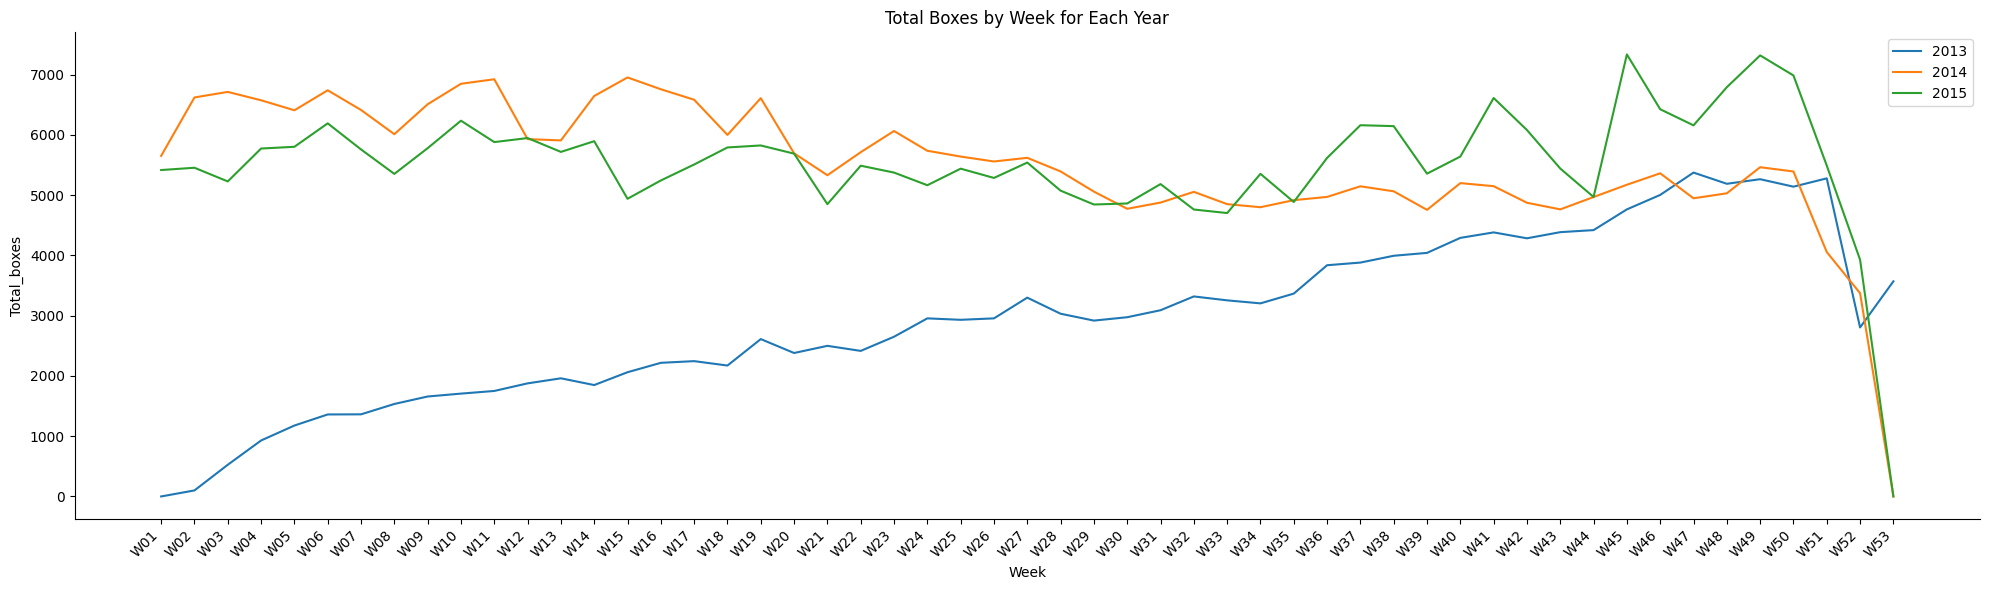

In [291]:
# Plotar gráfico de linhas

plt.figure(figsize=(20, 6))
for year in df_resultado_boxes['year'].unique():
    df_year = df_resultado_boxes[df_resultado_boxes['year'] == year]
    plt.plot(df_year['week'], df_year['Total_boxes'], label=str(year))

plt.xlabel('Week')
plt.ylabel('Total_boxes')
plt.title('Total Boxes by Week for Each Year')
# Ajustar espaçamento e orientação dos rótulos do eixo x
plt.xticks(rotation=45, ha='right')

# Remover as bordas de cima e da direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.tight_layout()
plt.show()

In [292]:
# Mesclar os DataFrames com base nas colunas "week" e "year"
df_merged = pd.merge(df_resultado_boxes, df_resultado_gross_revenue, on=['week', 'year'])
df_merged = pd.merge(df_merged, df_resultado_net_revenue, on=['week', 'year'])

# Visualizar o DataFrame resultante
print(df_merged)

    week  Total_boxes  year  Total_gross_revenue  Total_net_revenue
0    W01            0  2013                    0                  0
1    W02          100  2013                 4047               2310
2    W03          526  2013                20296              12342
3    W04          929  2013                35253              25807
4    W05         1177  2013                44641              35713
..   ...          ...   ...                  ...                ...
154  W49         7321  2015               310562             265797
155  W50         6988  2015               295797             261247
156  W51         5492  2015               240226             216590
157  W52         3929  2015               165642             147896
158  W53            0  2015                    0                  0

[159 rows x 5 columns]


In [293]:
# Mapear as semanas para os meses correspondentes
month_mapping = {
    'W01': 'Jan',
    'W02': 'Jan',
    'W03': 'Jan',
    'W04': 'Jan',
    'W05': 'Feb',
    'W06': 'Feb',
    'W07': 'Feb',
    'W08': 'Feb',
    'W09': 'Mar',
    'W10': 'Mar',
    'W11': 'Mar',
    'W12': 'Mar',
    'W13': 'Apr',
    'W14': 'Apr',
    'W15': 'Apr',
    'W16': 'Apr',
    'W17': 'May',
    'W18': 'May',
    'W19': 'May',
    'W20': 'May',
    'W21': 'Jun',
    'W22': 'Jun',
    'W23': 'Jun',
    'W24': 'Jun',
    'W25': 'Jul',
    'W26': 'Jul',
    'W27': 'Jul',
    'W28': 'Jul',
    'W29': 'Aug',
    'W30': 'Aug',
    'W31': 'Aug',
    'W32': 'Aug',
    'W33': 'Sep',
    'W34': 'Sep',
    'W35': 'Sep',
    'W36': 'Sep',
    'W37': 'Oct',
    'W38': 'Oct',
    'W39': 'Oct',
    'W40': 'Oct',
    'W41': 'Nov',
    'W42': 'Nov',
    'W43': 'Nov',
    'W44': 'Nov',
    'W45': 'Dec',
    'W46': 'Dec',
    'W47': 'Dec',
    'W48': 'Dec',
    'W49': 'Dec',
    'W50': 'Dec',
    'W51': 'Dec',
    'W52': 'Dec'
}

df_merged['month'] = df_merged['week'].map(month_mapping)

# Agrupar os dados por ano, mês e calcular a soma dos boxes
result_data = df_merged.groupby(['year', 'month']).agg({'Total_boxes': 'sum','Total_gross_revenue': 'sum','Total_net_revenue': 'sum'}).reset_index()

# Visualizar o DataFrame resultante
print(result_data)

    year month  Total_boxes  Total_gross_revenue  Total_net_revenue
0   2013   Apr         8090               313432             272878
1   2013   Aug        12305               479073             405117
2   2013   Dec        38829              1534985            1332791
3   2013   Feb         5436               209183             171503
4   2013   Jan         1555                59596              40459
5   2013   Jul        12221               478931             419569
6   2013   Jun        10523               411981             363215
7   2013   Mar         6994               271669             235141
8   2013   May         9412               366785             323849
9   2013   Nov        17476               692622             602673
10  2013   Oct        16212               639860             545855
11  2013   Sep        13665               535370             456902
12  2014   Apr        26271              1034875             905259
13  2014   Aug        19769               770733

In [294]:
# Definir a ordem dos meses
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Criar uma coluna com a ordem numérica dos meses
result_data['month_order'] = pd.Categorical(result_data['month'], categories=month_order, ordered=True).codes

# Ordenar o DataFrame pelos anos e pela ordem numérica dos meses
df_merged_sorted = result_data.sort_values(by=['year', 'month_order'])

# Remover a coluna de ordem numérica dos meses
df_merged_sorted = df_merged_sorted.drop('month_order', axis=1)

In [295]:
df_merged_sorted.head()

,year,month,Total_boxes,Total_gross_revenue,Total_net_revenue
4,2013,Jan,1555,59596,40459
3,2013,Feb,5436,209183,171503
7,2013,Mar,6994,271669,235141
0,2013,Apr,8090,313432,272878
8,2013,May,9412,366785,323849


In [296]:
df_merged_sorted['month_year'] = df_merged_sorted['month'] + '/' + df_merged_sorted['year'].astype(int).astype(str)

In [297]:
df_merged_sorted.head()

,year,month,Total_boxes,Total_gross_revenue,Total_net_revenue,month_year
4,2013,Jan,1555,59596,40459,Jan/2013
3,2013,Feb,5436,209183,171503,Feb/2013
7,2013,Mar,6994,271669,235141,Mar/2013
0,2013,Apr,8090,313432,272878,Apr/2013
8,2013,May,9412,366785,323849,May/2013


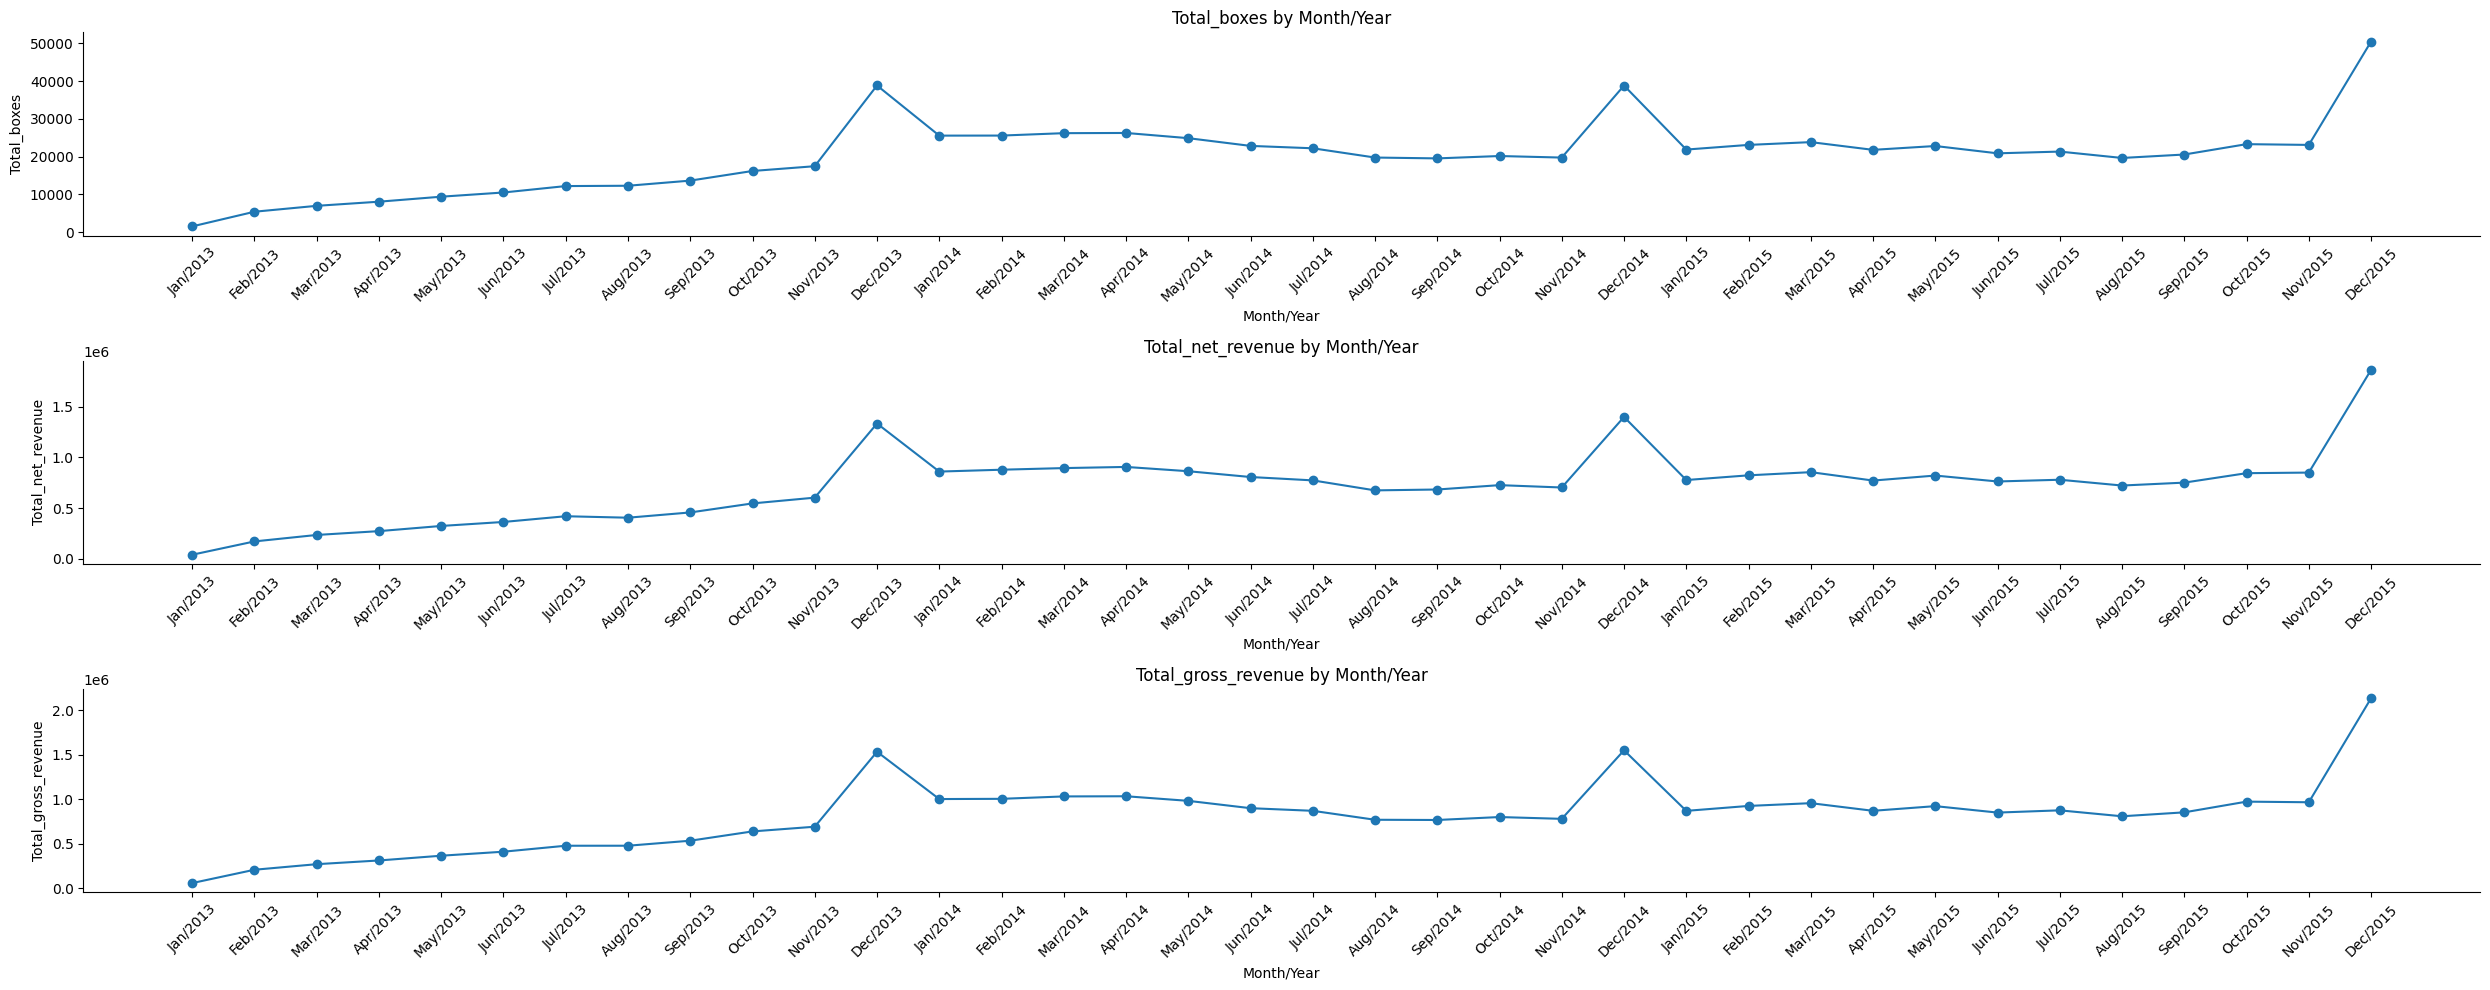

In [298]:
plt.figure(figsize=(25, 10))

# Gráfico Total_boxes por month_year
plt.subplot(3, 1, 1)
plt.plot(df_merged_sorted['month_year'], df_merged_sorted['Total_boxes'], marker='o', label='Total_boxes')
plt.xlabel('Month/Year')
plt.ylabel('Total_boxes')
plt.title('Total_boxes by Month/Year')
plt.xticks(rotation=45)
# Remover as bordas de cima e da direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Gráfico Total_net_revenue por month_year
plt.subplot(3, 1, 2)
plt.plot(df_merged_sorted['month_year'], df_merged_sorted['Total_net_revenue'], marker='o', label='Total_net_revenue')
plt.xlabel('Month/Year')
plt.ylabel('Total_net_revenue')
plt.title('Total_net_revenue by Month/Year')
plt.xticks(rotation=45)
# Remover as bordas de cima e da direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Gráfico Total_gross_revenue por month_year
plt.subplot(3, 1, 3)
plt.plot(df_merged_sorted['month_year'], df_merged_sorted['Total_gross_revenue'], marker='o', label='Total_gross_revenue')
plt.xlabel('Month/Year')
plt.ylabel('Total_gross_revenue')
plt.title('Total_gross_revenue by Month/Year')
plt.xticks(rotation=45)
# Remover as bordas de cima e da direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [299]:
# Criar novo dataframe com as colunas desejadas
df_new_meses = df_merged_sorted[['month_year', 'Total_net_revenue']]

In [300]:
num_linhas_df_new_meses = len(df_new_meses)
print(num_linhas_df_new_meses)

36


In [301]:
df.head()

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes,Ticket_Medio
0,206461,Paid Marketing,2014,W09,71,71,2,35.5
1,462640,Paid Marketing,2015,W25,28,56,1,56.0
2,666461,Referral,2015,W50,40,40,1,40.0
3,183202,Referral,2013,W42,18,37,1,37.0
4,410993,Referral,2014,W29,0,37,1,37.0


In [302]:
num_linhas_df = len(df)
print(num_linhas_df)

715875


In [303]:
df['date'] = df['year'].astype(str) + '/' + df['week']

In [304]:
df.head()

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes,Ticket_Medio,date
0,206461,Paid Marketing,2014,W09,71,71,2,35.5,2014/W09
1,462640,Paid Marketing,2015,W25,28,56,1,56.0,2015/W25
2,666461,Referral,2015,W50,40,40,1,40.0,2015/W50
3,183202,Referral,2013,W42,18,37,1,37.0,2013/W42
4,410993,Referral,2014,W29,0,37,1,37.0,2014/W29


In [305]:
# Criar novo dataframe com as colunas desejadas
df_new = df[['year','date', 'net_revenue']]


In [306]:
df_new.head()

,year,date,net_revenue
0,2014,2014/W09,71
1,2015,2015/W25,28
2,2015,2015/W50,40
3,2013,2013/W42,18
4,2014,2014/W29,0


In [307]:
df_new['date'] = df_new['date'].str.replace('W', '')

<ipython-input-307-67c93ec781c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['date'] = df_new['date'].str.replace('W', '')


In [308]:
df_new.head()

,year,date,net_revenue
0,2014,2014/09,71
1,2015,2015/25,28
2,2015,2015/50,40
3,2013,2013/42,18
4,2014,2014/29,0


In [309]:
# Separar o dataframe em dois conjuntos
df_treino = df_new.loc[df_new['year'] <= 2014]
df_teste = df_new.loc[df_new['year'] == 2015]

print(df_treino.shape,"\n")
print(df_teste.shape,"\n")

(427671, 3) 

(288204, 3) 



In [310]:
# Formatar data do treino
df_treino["date"] = df_treino["date"].apply(lambda x: x.replace("/",""))
df_treino["date"]  = df_treino["date"].astype(int)
df_treino.head()

<ipython-input-310-e4d2cc53793b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treino["date"] = df_treino["date"].apply(lambda x: x.replace("/",""))
<ipython-input-310-e4d2cc53793b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treino["date"]  = df_treino["date"].astype(int)


,year,date,net_revenue
0,2014,201409,71
3,2013,201342,18
4,2014,201429,0
5,2014,201411,23
6,2014,201425,0


In [311]:
# Formatar data do teste
df_teste["date"] = df_teste["date"].apply(lambda x: x.replace("/",""))
df_teste["date"]  = df_teste["date"].astype(int)
df_teste.head()

<ipython-input-311-9ca52af3c6fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["date"] = df_teste["date"].apply(lambda x: x.replace("/",""))
<ipython-input-311-9ca52af3c6fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["date"]  = df_teste["date"].astype(int)


,year,date,net_revenue
1,2015,201525,28
2,2015,201550,40
7,2015,201522,84
10,2015,201520,37
12,2015,201526,37


In [312]:
# Criar novo dataframe com as colunas desejadas
x_treino = df_treino[['date']]
x_treino.head()

,date
0,201409
3,201342
4,201429
5,201411
6,201425


In [313]:
y_treino = df_treino[['net_revenue']]
y_treino.head()

,net_revenue
0,71
3,18
4,0
5,23
6,0


In [314]:
x_teste = df_teste[['date']]
x_teste.head()

,date
1,201525
2,201550
7,201522
10,201520
12,201526


In [315]:
y_teste = df_teste[['net_revenue']]
y_teste.head()

,net_revenue
1,28
2,40
7,84
10,37
12,37


In [316]:
rmse=[]

Random Forest Regressor


In [317]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=200, n_estimators=10, random_state=0)

In [318]:
y_treino = y_treino['net_revenue'].values.ravel()

In [319]:
rf.fit(x_treino, y_treino)
y_pred = rf.predict(x_teste)
RMSE_RF = sqrt(mean_squared_error(y_true = y_teste, y_pred = y_pred))
rf = pd.DataFrame(y_pred)
rf.columns = ["Prediction_Confirmed"]
print(RMSE_RF)
rmse.append(RMSE_RF)

13.323895439822032


In [320]:
rf

,Prediction_Confirmed
0,38.679232
1,38.679232
2,38.679232
3,38.679232
4,38.679232
...,...
288199,38.679232
288200,38.679232
288201,38.679232
288202,38.679232


Linear Regression

In [321]:
lr = LinearRegression()
lr.fit(x_treino, y_treino)
y_pred = lr.predict(x_teste)
RMSE_lr = sqrt(mean_squared_error(y_true = y_teste, y_pred = y_pred))
lr = pd.DataFrame(y_pred)
lr.columns = ["Prediction_Confirmed"]
print(RMSE_lr)
rmse.append(RMSE_lr)
lr

13.191729189199275


,Prediction_Confirmed
0,36.741879
1,36.855759
2,36.728213
3,36.719103
4,36.746434
...,...
288199,36.860314
288200,36.741879
288201,36.646219
288202,36.678106


ARIMA


In [322]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import itertools
import warnings

In [323]:
# Definir uma lista de possíveis valores para p, d e q
p_values = range(0, 1)  
d_values = range(0, 1)
q_values = range(0, 1)

# Criar todas as combinações possíveis de p, d e q
combinations = list(itertools.product(p_values, d_values, q_values))

best_aic = float("inf")
best_params = None

# Realizar busca em grade
for order in combinations:
    try:
        model = ARIMA(y_treino, order=order)
        model_fit = model.fit()

        # Obter o valor do AIC
        aic = model_fit.aic

        # Atualizar os melhores parâmetros se o AIC atual for menor
        if aic < best_aic:
            best_aic = aic
            best_params = order
    except:
        continue

# Ajustar o modelo ARIMA com os melhores parâmetros encontrados
model = ARIMA(y_treino, order=best_params)
model_fit = model.fit()

# Fazer previsões
previsoes = model_fit.predict(start=len(y_treino), end=len(y_treino) + len(x_teste) - 1)

# Avaliar o desempenho do modelo
rmse_arima = np.sqrt(mean_squared_error(y_teste, previsoes))

# Imprimir as previsões e o RMSE
print("Previsões:", previsoes)
print("Melhores parâmetros:", best_params)
print("RMSE:", rmse_arima)

Previsões: [36.14301971 36.14301971 36.14301971 ... 36.14301971 36.14301971
 36.14301971]
Melhores parâmetros: (0, 0, 0)
RMSE: 13.21085627945448


Melhor modelo: Random Forest Regressor 

In [324]:
weeks = pd.Series(['W{:02d}'.format(week) for week in range(1, 25)])
df_futuro = pd.DataFrame({'year': ['2016'] * 24, 'week': weeks})

In [325]:
df_futuro.head(25)

,year,week
0,2016,W01
1,2016,W02
2,2016,W03
3,2016,W04
4,2016,W05
5,2016,W06
6,2016,W07
7,2016,W08
8,2016,W09
9,2016,W10


In [326]:
# Função para remover o "W" e juntar year com week
def join_year_week(row):
    return str(row['year']) + row['week'][1:]

# Aplicar a função no DataFrame
df_futuro['week'] = df_futuro.apply(join_year_week, axis=1)

# Exibir o DataFrame resultante
print(df_futuro)

    year    week
0   2016  201601
1   2016  201602
2   2016  201603
3   2016  201604
4   2016  201605
5   2016  201606
6   2016  201607
7   2016  201608
8   2016  201609
9   2016  201610
10  2016  201611
11  2016  201612
12  2016  201613
13  2016  201614
14  2016  201615
15  2016  201616
16  2016  201617
17  2016  201618
18  2016  201619
19  2016  201620
20  2016  201621
21  2016  201622
22  2016  201623
23  2016  201624


In [327]:
futuro = df_futuro[['week']]

In [328]:
futuro.head()

,week
0,201601
1,201602
2,201603
3,201604
4,201605
